In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install wordcloud
!pip install keras
!pip install tensorflow
!pip install tensorflow==2.12.*



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from wordcloud import WordCloud
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
!pip install neattext
import neattext.functions as nfx
import matplotlib.pyplot as plt
import plotly.express as plx
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import make_pipeline
from keras.layers import Embedding,Dense,LSTM,GRU,Bidirectional,GlobalMaxPooling1D,Input,Dropout
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.models import Sequential
import tensorflow as tf

from tqdm import tqdm
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
!pip install neattext
import neattext.functions as nfx
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding,Dense,LSTM,GRU,Bidirectional,GlobalMaxPooling1D,Input,Dropout
import pickle
from sklearn.preprocessing import LabelEncoder
import keras
!pip install keras_preprocessing
from keras_preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score


  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')

NameError: ignored

In [ ]:
df.head()

,class,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.isnull().sum()

class            0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df["class"].value_counts()

In [ ]:
train_data,test_data=train_test_split(df,test_size=0.2,random_state=10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       5572 non-null   object
 1   text        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df['class'].value_counts().index.values

array(['ham', 'spam'], dtype=object)

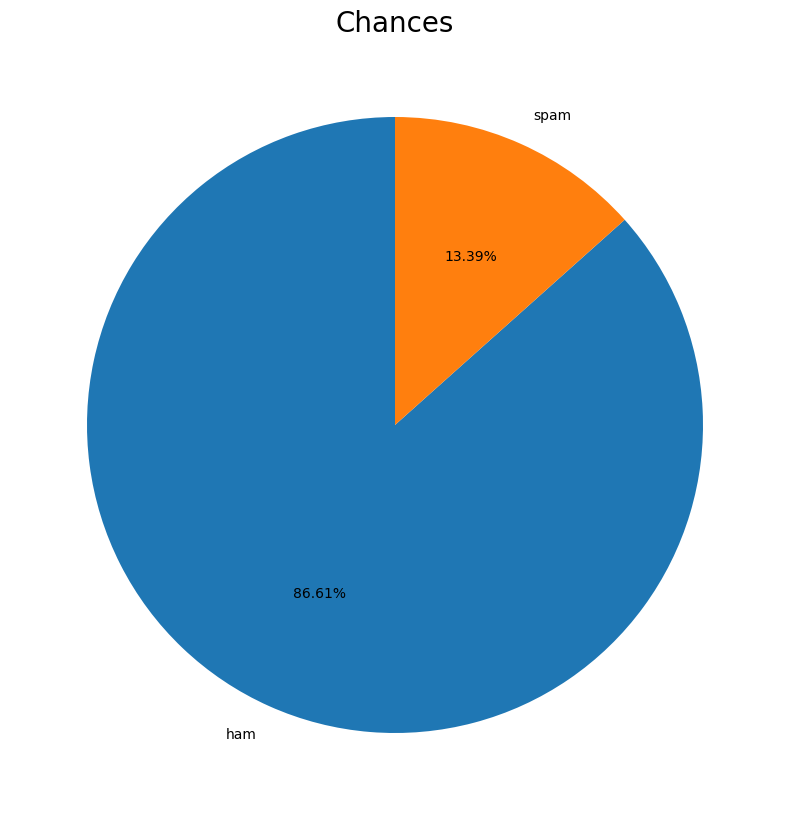

In [ ]:
plt.figure(figsize=(12,10))
plt.pie(train_data['class'].value_counts(),startangle=90, autopct='%0.2f%%',labels=['ham','spam'])
plt.title('Chances',fontdict={'size':20})
plt.show()

In [ ]:
  import nltk

In [ ]:
 nltk.download('stopwords')

In [ ]:
# text length
df['text_length'] = df['text'].apply(len)
df[['class','text_length','text']].head()

,class,text_length,text
0,ham,111,"Go until jurong point, crazy.. Available only ..."
1,ham,29,Ok lar... Joking wif u oni...
2,spam,155,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,49,U dun say so early hor... U c already then say...
4,ham,61,"Nah I don't think he goes to usf, he lives aro..."


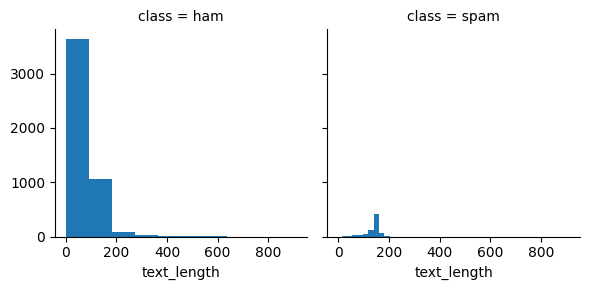

In [ ]:
g = sns.FacetGrid(df,col='class')
g.map(plt.hist,'text_length')

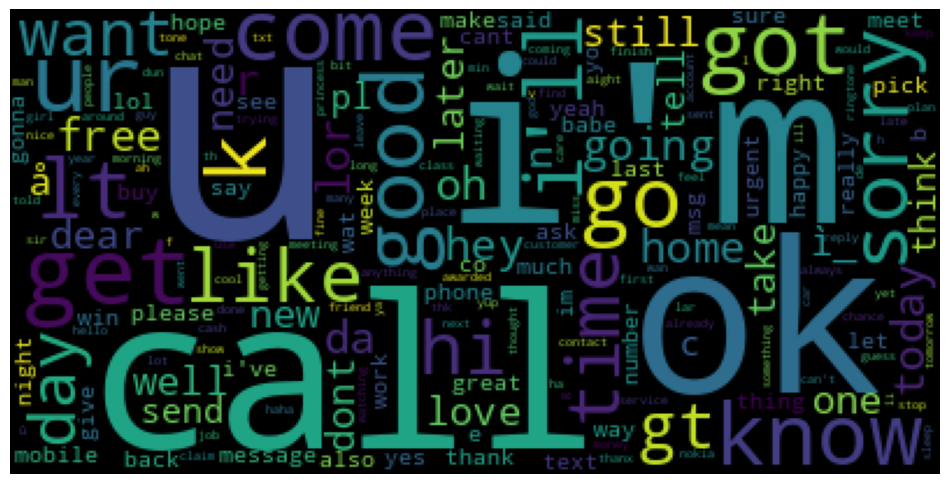

In [ ]:

from nltk.corpus import stopwords
from wordcloud import WordCloud
import re

def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    return s
df['clean_text'] = df['text'].apply(clean_text)

text = df['clean_text'].to_string().lower()
wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [ ]:
# Encode Categorical Variable
X = df['clean_text']
# y = pd.get_dummies(df['label']).values
encode_cat = {"class":{"['suicide ']": 0, "['non-suicide ']": 1},
             }
y_df = df.replace(encode_cat)
y = y_df['class']
y.value_counts()


ham     4825
spam     747
Name: class, dtype: int64

In [ ]:
seed = 101 # fix random seed for reproducibility
np.random.seed(seed)

In [ ]:
# Split Train Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4457,) (1115,) (4457,) (1115,)


In [ ]:
vocab_size = 20000  # Max number of different word, i.e. model input dimension
maxlen = 80  # Max number of words kept at the end of each text

In [ ]:
!pip install keras.preprocessing
!pip install tensorflow
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.pipeline import TransformerMixin
from sklearn.base import BaseEstimator
from tensorflow.keras.preprocessing.sequence import pad_sequences


class TextsToSequences(Tokenizer, BaseEstimator, TransformerMixin):
    """ Sklearn transformer to convert texts to indices list
    (e.g. [["the cute cat"], ["the dog"]] -> [[1, 2, 3], [1, 4]])"""
    def __init__(self,  **kwargs):
        super().__init__(**kwargs)

    def fit(self, texts, y=None):
        self.fit_on_texts(texts)
        return self

    def transform(self, texts, y=None):
        return np.array(self.texts_to_sequences(texts))

sequencer = TextsToSequences(num_words=vocab_size)

In [ ]:
class Padder(BaseEstimator, TransformerMixin):
    """ Pad and crop uneven lists to the same length.
    Only the end of lists longernthan the maxlen attribute are
    kept, and lists shorter than maxlen are left-padded with zeros

    Attributes
    ----------
    maxlen: int
        sizes of sequences after padding
    max_index: int
        maximum index known by the Padder, if a higher index is met during
        transform it is transformed to a 0
    """
    def __init__(self, maxlen=500):
        self.maxlen = maxlen
        self.max_index = None

    def fit(self, X, y=None):
        self.max_index = pad_sequences(X, maxlen=self.maxlen).max()
        return self

    def transform(self, X, y=None):
        X = pad_sequences(X, maxlen=self.maxlen)
        X[X > self.max_index] = 0
        return X

padder = Padder(maxlen)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import make_pipeline

batch_size = 64
max_features = vocab_size + 1

import tensorflow as tf
tf.random.set_seed(seed)


batch_size = 1000
max_features = vocab_size + 1

import tensorflow as tf
tf.random.set_seed(1)


def create_model(max_features):
    """ Model creation function: returns a compiled LSTM"""
    model = Sequential()
    model.add(Embedding(max_features, 128))
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Use Keras Scikit-learn wrapper to instantiate a GRU with all methods
# required by Scikit-learn for the last step of a Pipeline
sklearn_bilstm = KerasClassifier(build_fn=create_model, epochs=15, batch_size=batch_size,
                               max_features=max_features, verbose=1)

In [ ]:
# Build the Scikit-learn pipeline

!pip install keras==2.4.3
pipeline = make_pipeline(sequencer, padder, sklearn_bilstm)

pipeline.fit(X_train, y_train);

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.1 requires keras<2.13,>=2.12.0, but you have keras 2.4.3 which is incompatible.


Epoch 1/15


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7ff1db16a170>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7ff1db16a170>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 59s 5s/step - loss: 0.5942 - accuracy: 0.8656
Epoch 2/15
5/5 [==============================] - 26s 5s/step - loss: 0.3982 - accuracy: 0.8658
Epoch 3/15
5/5 [==============================] - 24s 5s/step - loss: 0.3240 - accuracy: 0.8658
Epoch 4/15
5/5 [==============================] - 27s 5s/step - loss: 0.2670 - accuracy: 0.8658
Epoch 5/15
5/5 [==============================] - 24s 5s/step - loss: 0

In [ ]:
print('Computing predictions on test set...')

y_preds = pipeline.predict(X_test)

Computing predictions on test set...


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7ff17f9ef7f0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7ff17f9ef7f0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
35/35 [==============================] - 8s 137ms/step


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def model_evaluate():

    print('Test Accuracy:\t{:0.1f}%'.format(accuracy_score(y_test,y_preds)*100))

    #classification report
    print('\n')
    print(classification_report(y_test, y_preds))

    #confusion matrix
    confmat = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

Test Accuracy:	99.0%


              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.99      0.94      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



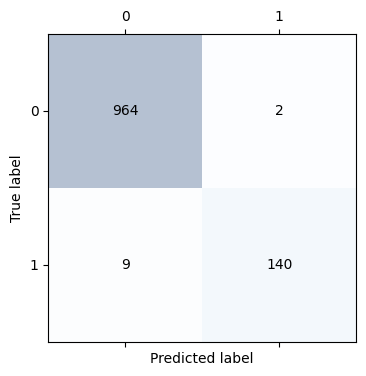

In [ ]:
model_evaluate()